In [0]:
import fastai
from fastai import *  # 导入子包是个不错的习惯
from fastai.vision import *  # 很多视觉模块的包

In [0]:
# 导入数据集
mnist = untar_data(URLs.MNIST_TINY)  # 解压数据集并返回存放路径
transform = get_transforms(do_flip=False)  # 得到一个翻转的转化器

data = (ImageList.from_folder(mnist)  # 从目录读取
        .split_by_folder()  # 按照目录结构切分          
        .label_from_folder()  # 读取label
        .add_test_folder('test')  # 增加test目录
        .transform(transform, size=32)  # 使用创建的转换器
        .databunch()  # bunch化
        .normalize(imagenet_stats))  # 按照imagenet标准归一
print(type(data))

<class 'fastai.vision.data.ImageDataBunch'>


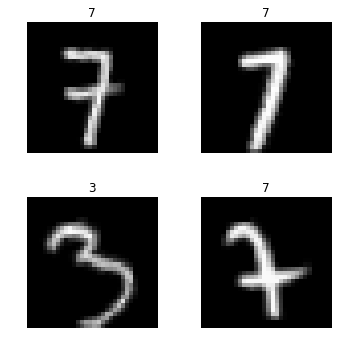

In [14]:
# 可视化数据
# data.show_batch()  # 使用这种显示方法可能会溢出屏幕
data.show_batch(rows=2, figsize=(5, 5))

In [13]:
# 创建模型
learn = cnn_learner(data, models.resnet18, metrics=accuracy)  # 创建模型，使用预训练模型
learn.fit(epochs=15, lr=0.01)
learn.save('mnist_train')

epoch,train_loss,valid_loss,accuracy,time
0,0.416528,0.151459,0.941345,00:01
1,0.250558,0.027465,0.987124,00:01
2,0.177372,0.045108,0.982833,00:01
3,0.144727,0.031127,0.992847,00:01
4,0.122623,0.036310,0.988555,00:01
5,0.119397,0.038653,0.988555,00:01
6,0.109966,0.019811,0.994278,00:01
7,0.090671,0.018985,0.994278,00:01
8,0.073377,0.012358,0.995708,00:01
9,0.061980,0.037566,0.989986,00:01


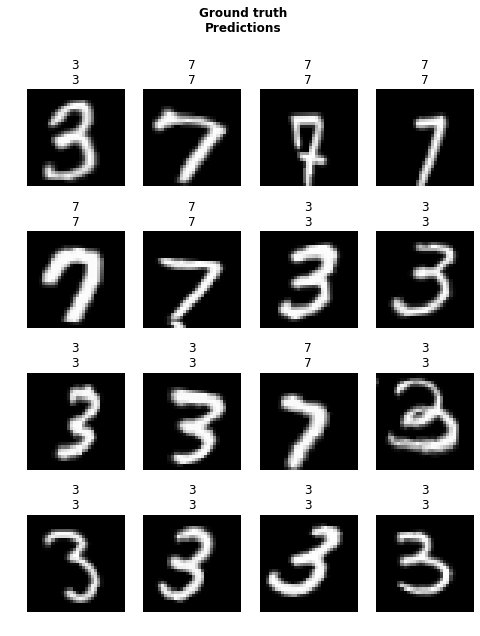

In [19]:
# learn.show_results()  # 这样显示屏幕也可能溢出
learn.show_results(ds_type=DatasetType.Train, rows=4, figsize=(8,10))  # 这里指定数据分布类型为Train这样就不会显示有序数据而是打乱显示